### Logistic Regression with Custom Thresholds

Logistic Regression is a type of regression analysis used for predicting the outcome of a categorical dependent variable based on one or more predictor variables. Unlike linear regression, which is used for predicting continuous outcomes, logistic regression is used for predicting binary or multi-class outcomes.

#### Logistic Function (Sigmoid Function)

Logistic Regression uses the logistic function, also known as the sigmoid function, to model the probability of a certain class or event existing. The sigmoid function maps any real-valued number into a value between 0 and 1, which can be interpreted as a probability.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

where \( x \) is the input to the function.

#### Logistic Regression Model

The logistic regression model can be written as:

$$
P(y=1|X) = \sigma(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)
$$

where:
$$
\begin{array}{ll}
P(y=1|X) & \text{is the probability of the dependent variable being 1 given the independent variables } X. \\
\beta_0 & \text{is the intercept.} \\
\beta_1, \beta_2, \dots, \beta_n & \text{are the coefficients of the independent variables.}
\end{array}
$$

#### Why Logistic Regression for Classification?

Logistic Regression is primarily used for classification because it predicts probabilities and applies a threshold (typically 0.5) to determine class membership. This makes it suitable for binary classification tasks. For multi-class classification, extensions like multinomial logistic regression can be used.




In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LogisticRegression(max_iter=1000000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_proba = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled)

In [8]:
# Custom thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# Initialize lists for confusion matrix components
tps = []
fps = []
tns = []
fns = []

# Calculate true positives, false positives, true negatives, and false negatives for each threshold
for threshold in thresholds:
    temp_prediction = [1 if y >= threshold else 0 for y in y_pred_proba[:, 1]]
    tn, fp, fn, tp = confusion_matrix(y_test, temp_prediction).ravel()
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)

# Create the dataframe with thresholds, true positives, false positives, true negatives, and false negatives
df_confusion_matrix = pd.DataFrame({'Thresholds': thresholds, 
                                    'TruePositive': tps, 'FalsePositive': fps,
                                    'TrueNegative': tns, 'FalseNegative': fns})

# Calculate recall, precision, F1 score, and false positive ratio
df_confusion_matrix["recall"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalseNegative"])
df_confusion_matrix["precision"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalsePositive"])
df_confusion_matrix["f1_score"] = 2 * (df_confusion_matrix["precision"] * df_confusion_matrix["recall"]) / (df_confusion_matrix["precision"] + df_confusion_matrix["recall"])

In [9]:
df_confusion_matrix

,Thresholds,TruePositive,FalsePositive,TrueNegative,FalseNegative,recall,precision,f1_score
0,0.00,108,63,0,0,1.000000,0.631579,0.774194
1,0.10,108,6,57,0,1.000000,0.947368,0.972973
2,0.20,108,3,60,0,1.000000,0.972973,0.986301
3,0.30,107,3,60,1,0.990741,0.972727,0.981651
4,0.40,107,2,61,1,0.990741,0.981651,0.986175
5,0.50,106,1,62,2,0.981481,0.990654,0.986047
6,0.60,105,1,62,3,0.972222,0.990566,0.981308
7,0.70,103,1,62,5,0.953704,0.990385,0.971698
8,0.80,100,1,62,8,0.925926,0.990099,0.956938
9,0.85,99,1,62,9,0.916667,0.990000,0.951923


In [10]:
# Import the graph_objects module from the Plotly library
import plotly.graph_objects as go

# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_metrix DataFrame to two decimal places
df_confusion_matrix_graph = df_confusion_matrix.round(3)

fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()

(array([54.,  3.,  0.,  3.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,
         2.,  2.,  1.,  1.,  2.,  4., 94.]),
 array([1.03443618e-12, 4.99999942e-02, 9.99999884e-02, 1.49999983e-01,
        1.99999977e-01, 2.49999971e-01, 2.99999965e-01, 3.49999960e-01,
        3.99999954e-01, 4.49999948e-01, 4.99999942e-01, 5.49999936e-01,
        5.99999931e-01, 6.49999925e-01, 6.99999919e-01, 7.49999913e-01,
        7.99999908e-01, 8.49999902e-01, 8.99999896e-01, 9.49999890e-01,
        9.99999884e-01]),
 <BarContainer object of 20 artists>)

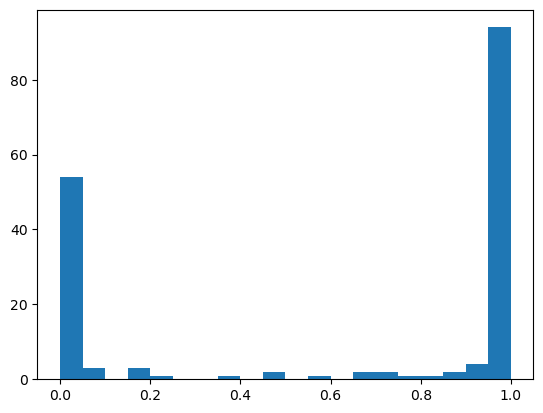

In [11]:
plt.hist(y_pred_proba[:, 1], bins=20)